# **Exploratory Data Analysis on Dataset (EDA)**

In [2]:
# Here we have imported 'pandas' library which is a data manipulation tool in python used to perform various techniques on dataset
import pandas as pd

In [3]:
# Here we have loaded the dataset into a DataFrame named as 'df'
df = pd.read_csv('/content/Cardiographic.csv')
df

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,73.0,0.5,43.000000,2.4,64.0,0.999926,2.000000
1,132.000000,0.006380,0.000000,0.006380,0.003190,0.0,0.0,17.0,2.1,0.000000,10.4,130.0,0.000000,1.000000
2,133.000000,0.003322,0.000000,0.008306,0.003322,0.0,0.0,16.0,2.1,0.000000,13.4,130.0,0.000000,1.000000
3,134.000000,0.002561,0.000000,0.007742,0.002561,0.0,0.0,16.0,2.4,0.000000,23.0,117.0,1.000000,1.000000
4,131.948232,0.006515,0.000000,0.008143,0.000000,0.0,0.0,16.0,2.4,0.000000,19.9,117.0,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.000000,0.000000,0.961268,0.007426,0.000000,0.0,0.0,79.0,0.2,25.000000,7.2,40.0,0.000000,2.000000
2122,140.000000,0.000775,0.000000,0.006979,0.000000,0.0,0.0,78.0,0.4,22.000000,7.1,66.0,1.000000,2.000000
2123,140.000000,0.000980,0.000000,0.006863,0.000000,0.0,0.0,79.0,0.4,20.000000,6.1,67.0,1.000000,1.990464
2124,140.000000,0.000679,0.000000,0.006110,0.000000,0.0,0.0,78.0,0.4,27.000000,7.0,66.0,1.000000,2.000000


## **1. Data Cleaning and Preparation :**

Handling Missing Values

In [4]:
# Here we have checked for missing values
#  'df.isnull()' This method checks each cell in the DataFrame 'df' to see if it contains a missing value
#  'sum()'  This adds the number of missing values for each column in the DataFrame
#   'missing_values'  The results are stored in variable 'missing_values'

missing_values = df.isnull().sum()
print("Missing Values per Column:\n", missing_values)

Missing Values per Column:
 LB          21
AC          20
FM           0
UC           0
DL           0
DS          21
DP          21
ASTV         0
MSTV         0
ALTV         0
MLTV        21
Width       21
Tendency    21
NSP         21
dtype: int64


In [5]:
# Here we have dropped rows with missing values
#   'df.dropna()'   This method removes any rows from the DataFrame 'df' that contain at least one missing value
df_cleaned = df.dropna()

Correcting Data Types

In [6]:
# Here we have converted numerical columns which was stored as strings into float
# 'for col in df_cleaned.columns'    This loop iterates over each column in the DataFrame 'df_cleaned'
# 'if df_cleaned[col].dtype == 'object''     Checks if the current columnis of type object
# 'pd.to_numeric(df_cleaned[col])'  Attempts to convert the column's values to numeric i.e float or int
# If the conversion is successful then the column is updated to 'df_cleaned[col]' with the numeric values
# If a 'ValueError' occurs like if the column contains non-numeric strings then the loop skips this column and continues to the next
# 'continue'  Skips the current iteration if a 'ValueError' is encountered

for col in df_cleaned.columns:
    if df_cleaned[col].dtype == 'object':
        try:
            df_cleaned[col] = pd.to_numeric(df_cleaned[col])
        except ValueError:
            continue


df_cleaned.dtypes

,0
LB,float64
AC,float64
FM,float64
UC,float64
DL,float64
DS,float64
DP,float64
ASTV,float64
MSTV,float64
ALTV,float64


Detecting and Treating Outliers

In [7]:
# Here we have imported 'numpy' library which is used for numerical operations assigned as an alias 'np'
import numpy as np

In [8]:
# Here we have used a function to identify outliers using Interquantile Range (IQR)

def detect_outliers_iqr(df):    # Here we have define a function named 'detect_outliers_iqr' that takes a DataFrame 'df' as input

    outliers = pd.DataFrame()   # Here we have initialized an empty DataFrame outliers to store rows identified as outliers

    for col in df.columns:      # This loops over each column in the DataFrame

        if np.issubdtype(df[col].dtype, np.number):   # This checks if the column contains numeric data types

            Q1 = df[col].quantile(0.25)   # This calculates the first quartile i.e 25th percentile of the column
            Q3 = df[col].quantile(0.75)   # This calculates the third quartile i.e 75th percentile of the column

            IQR = Q3 - Q1   # This computes the Interquartile Range (IQR) which is the range between Q1 and Q3

            lower_bound = Q1 - 1.5 * IQR    # This determines the lower bound for identifying outliers
            upper_bound = Q3 + 1.5 * IQR    # This determines the upper bound for identifying outliers

# Here we have appended the rows of the DataFrame that have values below 'lower_bound' or above 'upper_bound' to the 'outliers' DataFrame
            outliers = outliers.append(df[(df[col] < lower_bound) | (df[col] > upper_bound)])

    return outliers   # This returns the DataFrame containing all outliers detected

## **2. Statistical Summary**

Generating a Statistical Summary

In [9]:
# Statistical summary for each variable
summary = df_cleaned.describe()   # Here we have generated descriptive statistics for each numerical column in df_cleaned like count, mean, standard deviation, etc
summary

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
count,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000
mean,133.343598,0.003202,0.009963,0.004388,0.001892,0.000003,0.000175,46.996929,1.361006,10.353647,8.284887,70.429260,0.316371,1.304507
std,11.270154,0.004324,0.067870,0.003350,0.003348,0.000142,0.000840,18.847737,1.173164,21.282102,7.772858,42.931822,0.645622,0.644619
min,51.842487,-0.019284,-0.480634,-0.014925,-0.015393,-0.001353,-0.005348,-63.000000,-6.600000,-91.000000,-50.700000,-174.000000,-3.000000,-1.025988
25%,126.000000,0.000000,0.000000,0.001838,0.000000,0.000000,0.000000,32.000000,0.700000,0.000000,4.600000,37.000000,0.000000,1.000000
50%,133.000000,0.001631,0.000000,0.004484,0.000000,0.000000,0.000000,49.000000,1.200000,0.000000,7.400000,67.000000,0.000000,1.000000
75%,140.000000,0.005650,0.002554,0.006536,0.003289,0.000000,0.000000,61.000000,1.700000,11.000000,10.900000,100.000000,1.000000,1.000000
max,214.000000,0.038567,0.961268,0.030002,0.030769,0.002706,0.010695,162.000000,13.800000,182.000000,101.400000,357.000000,3.000000,5.000000


Additional Statistics (Median and IQR)

In [10]:
# Here we have calculated median and interquartile range
summary['median'] = df_cleaned.median()     # This computes the median i.e 50th percentile for each numerical column

# Here we have calculated the IQR for each numerical column by subtracting the 25th percentile from the 75th percentile
summary['IQR'] = df_cleaned.quantile(0.75) - df_cleaned.quantile(0.25)

In [11]:
# This prints the updated stastical summary with median and IQR
print("Statistical Summary:\n", summary)

Statistical Summary:
                 LB           AC           FM           UC           DL  \
count  2105.000000  2105.000000  2105.000000  2105.000000  2105.000000   
mean    133.343598     0.003202     0.009963     0.004388     0.001892   
std      11.270154     0.004324     0.067870     0.003350     0.003348   
min      51.842487    -0.019284    -0.480634    -0.014925    -0.015393   
25%     126.000000     0.000000     0.000000     0.001838     0.000000   
50%     133.000000     0.001631     0.000000     0.004484     0.000000   
75%     140.000000     0.005650     0.002554     0.006536     0.003289   
max     214.000000     0.038567     0.961268     0.030002     0.030769   

                DS           DP         ASTV         MSTV         ALTV  \
count  2105.000000  2105.000000  2105.000000  2105.000000  2105.000000   
mean      0.000003     0.000175    46.996929     1.361006    10.353647   
std       0.000142     0.000840    18.847737     1.173164    21.282102   
min      -0.001

## **3. Data Visualization**

Histograms and Boxplots

In [12]:
# Here we have imported 'matplotlib.pyplot' library for creating static, interactive, and animated visualizations, assigned alias as plt
import matplotlib.pyplot as plt

# Here we have imported seaborn library which provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns

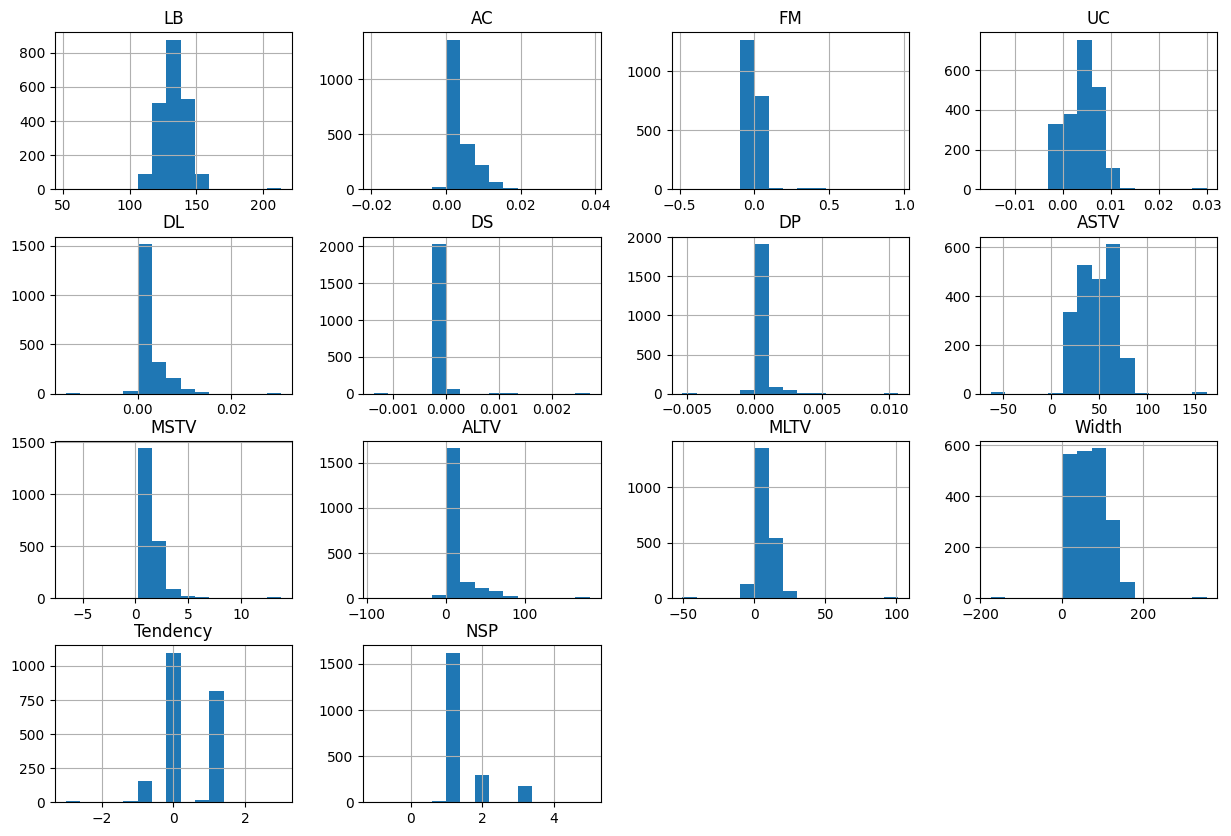

In [13]:
# Here we have plotted a histogram for numerical variables
df_cleaned.hist(bins=15, figsize=(15, 10))    # This creates a histogram for each numerical columns in 'df_cleaned'
plt.show()    # Displays the generated histogram

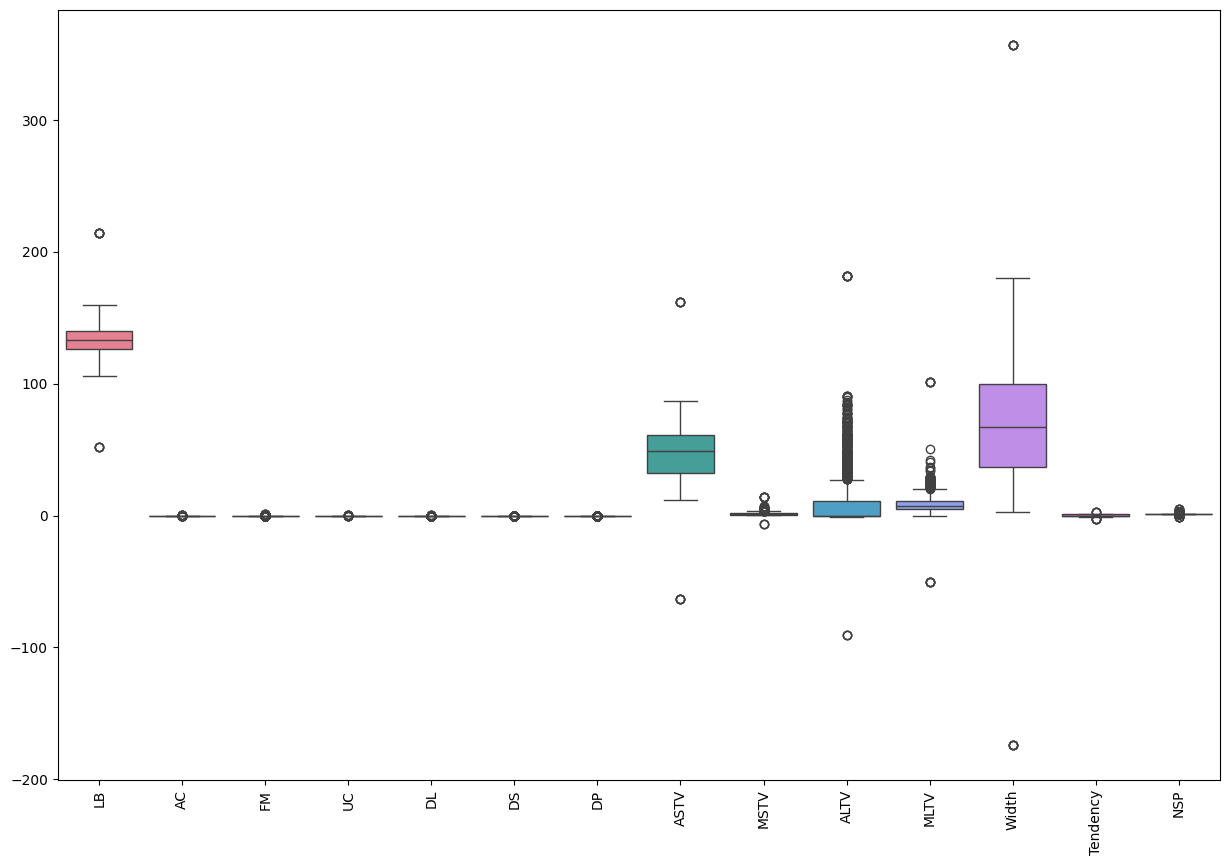

In [14]:
# Here we have plotted a boxplot for numerical variables
plt.figure(figsize=(15, 10))
sns.boxplot(data=df_cleaned)    # This generates a boxplot for each numerical column in 'df_cleaned'
plt.xticks(rotation=90)   # This rotates the X-axis label by 90 degrees to make them easier to read
plt.show()  # This displays the generated boxplot

Pie Chart

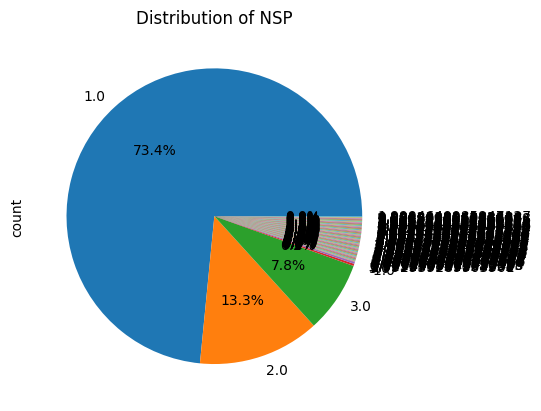

In [15]:
# Here we have showed a Pie Chart of categorical column NSP
# This plots a pie chart showing the distribution of each category in the column 'col'

df_cleaned[col].value_counts().plot(kind='pie', autopct='%1.1f%%')   # 'autopct='%1.1f%%'  This adds percentage labels to the pie slices
plt.title(f"Distribution of {col}")     #  This sets the title of the pie chart
plt.show()    # This displays the pie chart

Correlation Heatmaps

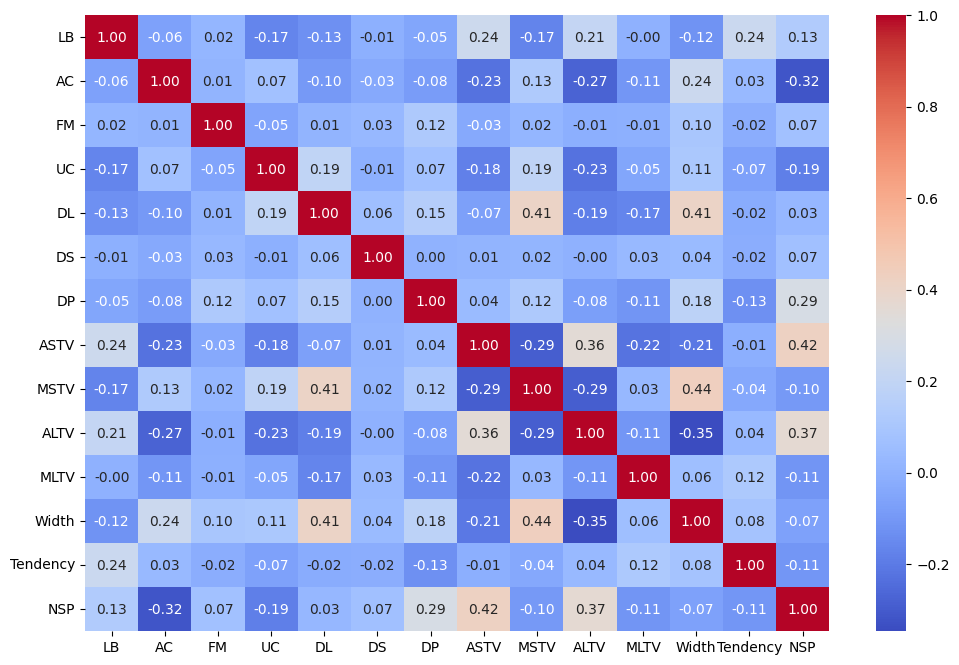

In [17]:
# Correlation heatmap
plt.figure(figsize=(12, 8))

# Here we have generated a heatmap that visualizes the correlation matrix of the numerical variables in 'df_cleaned'
# 'df_cleaned.corr()'   computes the correlation matrix for 'df_cleaned'
# cmap='coolwarm'  uses the coolwarm color map for the heatmap
# where positive correlations are shaded in warm colors and negative correlations in cool colors
# fmt=".2f"  formats the correlation values to two decimal places
sns.heatmap(df_cleaned.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.show()


Advanced Visualization Techniques

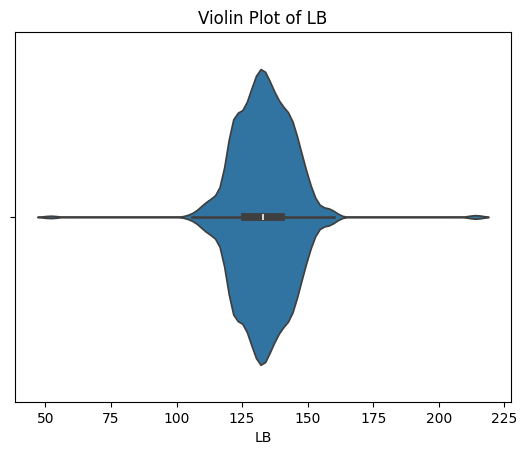

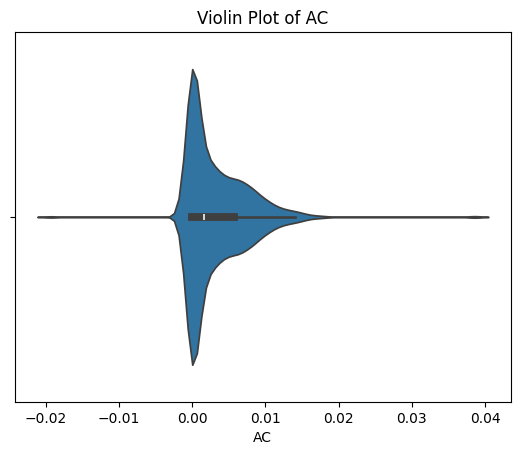

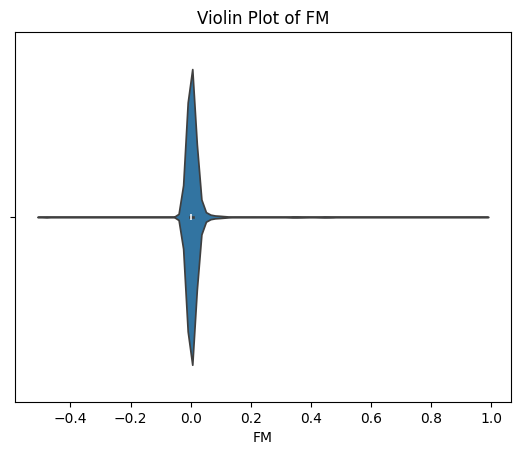

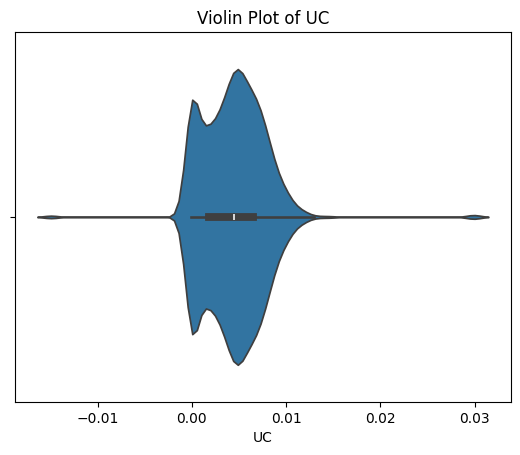

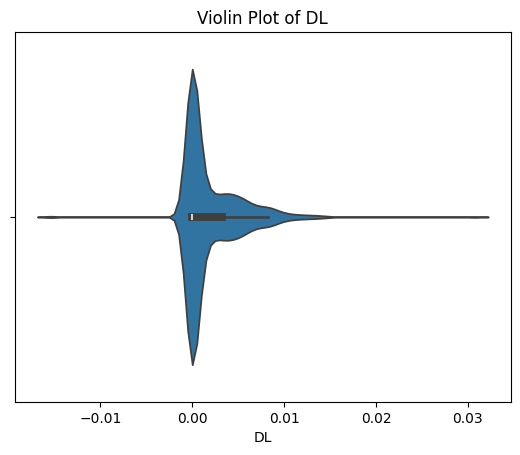

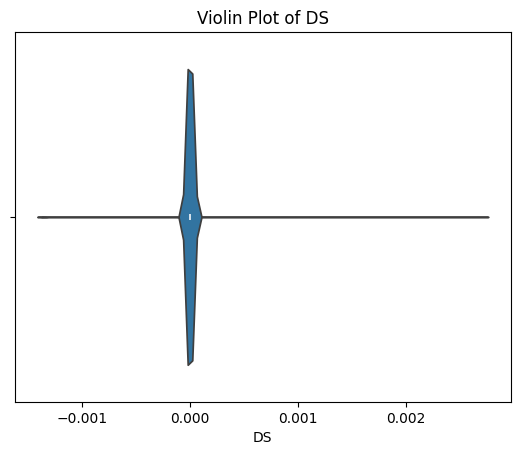

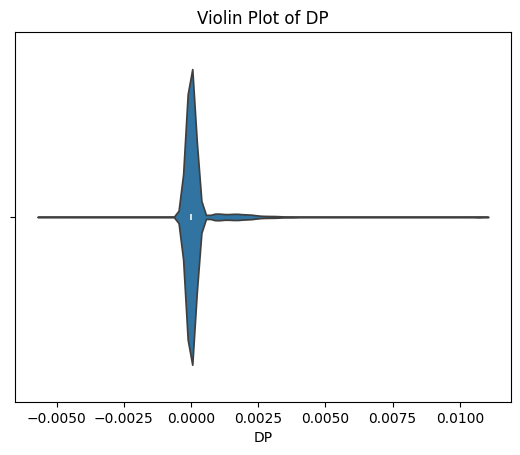

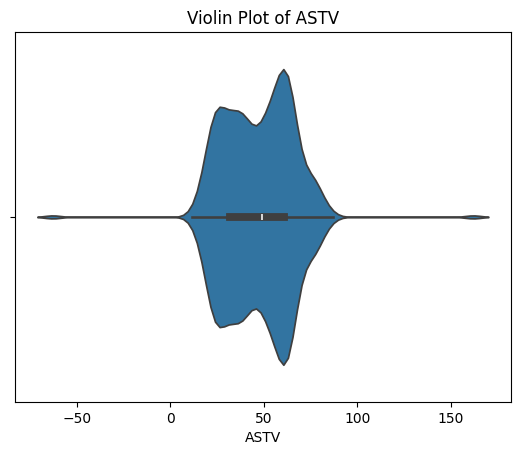

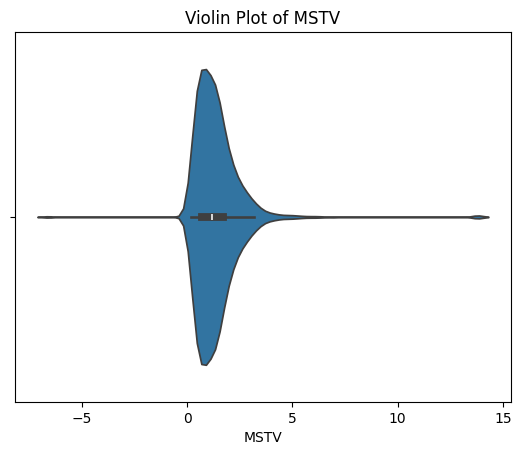

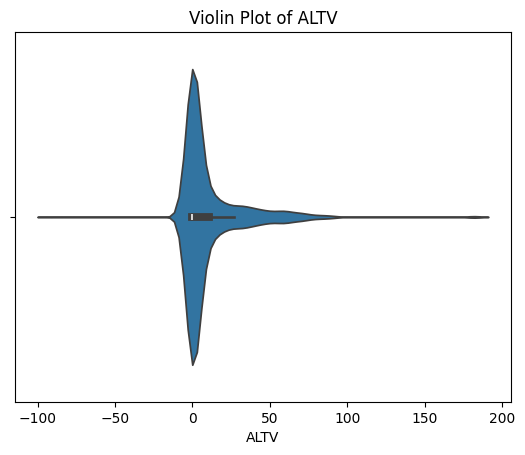

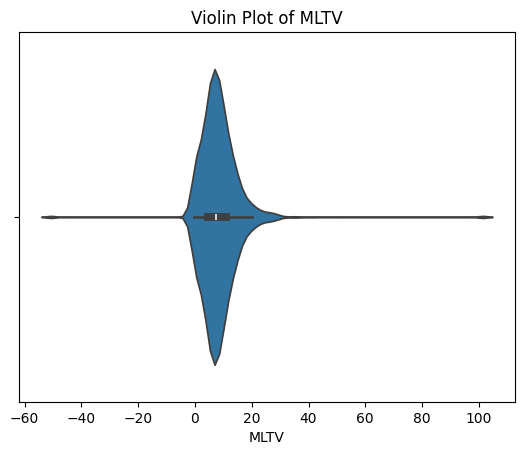

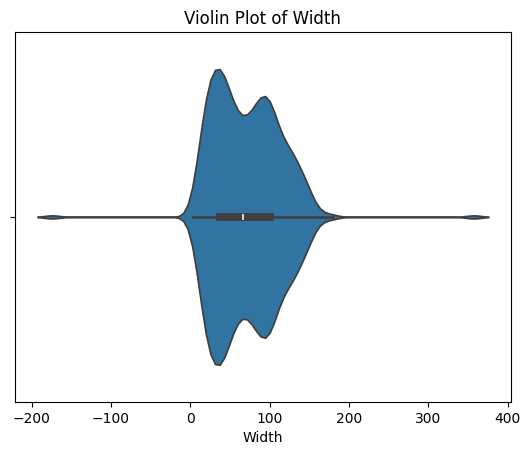

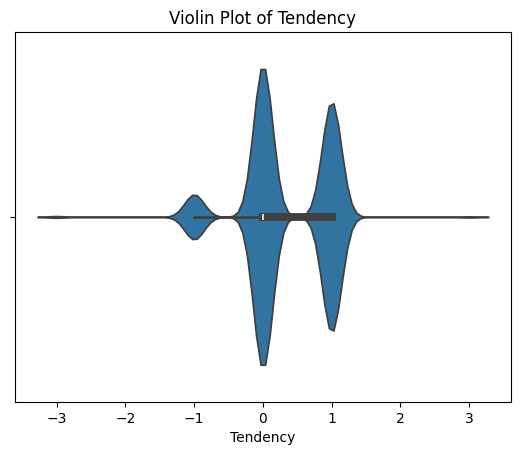

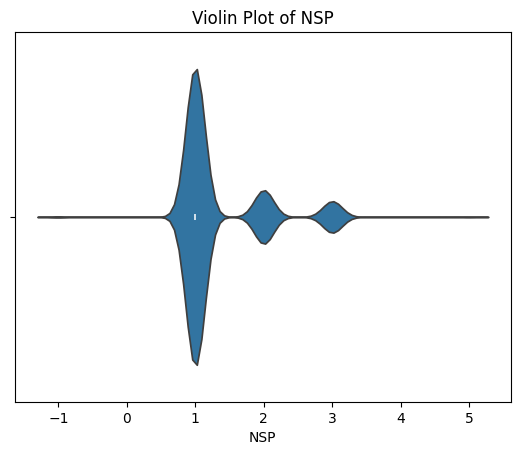

In [22]:
# Here we have displayed a 'Violin Plot'

for col in df_cleaned.columns:    # Here this loops over each column in 'df_cleaned'
    if np.issubdtype(df_cleaned[col].dtype, np.number):   # Here this checks if the column contains numerical data
        sns.violinplot(x=df_cleaned[col])   # Here this creates a violin plot for the column col, showing the distribution, density, and probability of the data.
        plt.title(f"Violin Plot of {col}")   # This sets the title of the violin plot
        plt.show()

## **4.	Pattern Recognition and Insights**

Identifying Correlations

In [23]:
# Here we have identified correlations between variables and discuss their potential implications

# This computes the pairwise correlation between all numeric variables in the DataFrame.
# It outputs a matrix where each value shows how strongly two variables are correlated.

correlation_matrix = df_cleaned.corr()
print(correlation_matrix)

                LB        AC        FM        UC        DL        DS  \
LB        1.000000 -0.063830  0.018777 -0.166570 -0.126959 -0.005438   
AC       -0.063830  1.000000  0.010152  0.070135 -0.095491 -0.033623   
FM        0.018777  0.010152  1.000000 -0.052979  0.009830  0.029901   
UC       -0.166570  0.070135 -0.052979  1.000000  0.191864 -0.006937   
DL       -0.126959 -0.095491  0.009830  0.191864  1.000000  0.058625   
DS       -0.005438 -0.033623  0.029901 -0.006937  0.058625  1.000000   
DP       -0.047724 -0.084590  0.121284  0.070658  0.145425  0.004285   
ASTV      0.242625 -0.230487 -0.032783 -0.181133 -0.070792  0.008452   
MSTV     -0.170473  0.126752  0.017481  0.190011  0.410155  0.016163   
ALTV      0.210728 -0.273890 -0.012276 -0.227817 -0.186571 -0.004398   
MLTV     -0.003457 -0.106529 -0.006237 -0.049460 -0.165750  0.034349   
Width    -0.118425  0.238436  0.097213  0.107397  0.410031  0.040832   
Tendency  0.236864  0.032481 -0.018339 -0.066610 -0.023569 -0.01

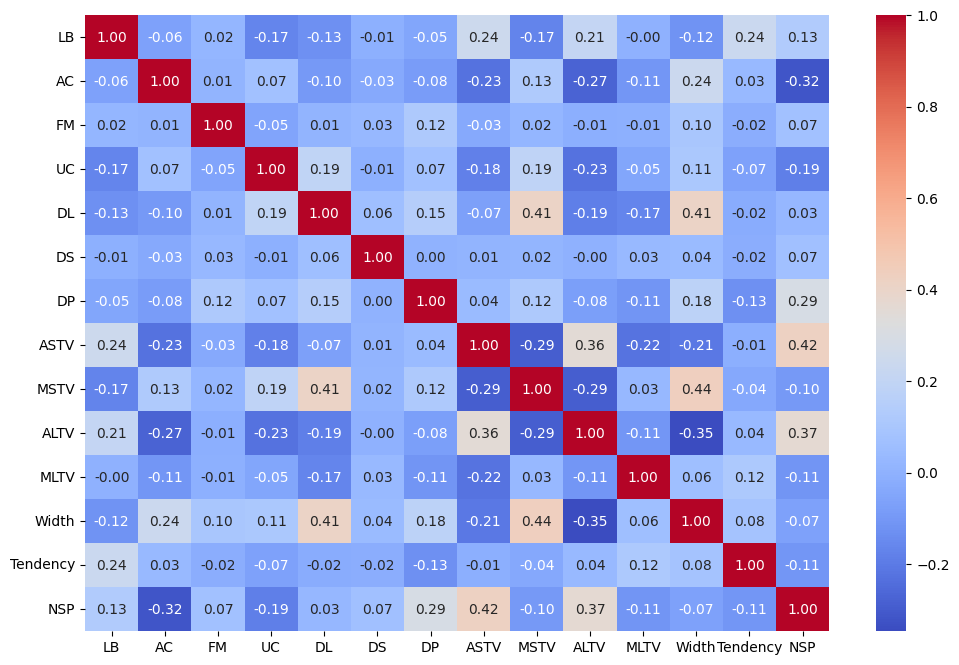

In [25]:
# Here we have visualize the correlation by usin heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

## **5. Conclusion**

Impact of Findings

Medical Implications:
The correlations and patterns discovered can help doctors and healthcare providers monitor fetal health more effectively. For example, if uterine contractions are shown to have a significant negative impact on fetal heart rate, timely intervention may be necessary to prevent fetal distress.

Decision Making:
This analysis can guide decision-makers in designing monitoring protocols. For instance, higher correlations between accelerations and fetal well-being might encourage practitioners to focus on detecting and analyzing fetal accelerations.

Further Analysis:
Further studies could build predictive models using these insights, particularly if time-series data is available. You could forecast fetal health metrics based on maternal activity or other factors and improve early detection of complications.

**Conclusion**


The exploratory analysis of the cardiographic dataset reveals key patterns, such as the strong correlations between uterine contractions (UC) and baseline fetal heart rate (LB), suggesting a significant impact of maternal uterine activity on fetal well-being. Additionally, high correlations between accelerations (AC) and fetal movements (FM) indicate that periods of increased fetal activity may elevate heart rate, providing useful indicators of fetal health. These findings highlight the importance of continuous monitoring of these variables in prenatal care to detect potential signs of fetal distress early and guide timely medical interventions.